In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [6]:
df.shape

(400, 5)

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
#separateinput and output

In [14]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [15]:
x;

Text(0.5, 1.0, 'Age vs Salary colored by Purchased')

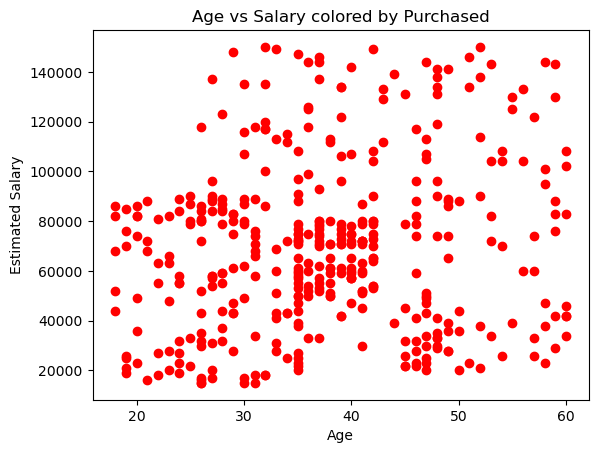

In [27]:
plt.scatter(x['Age'], x['EstimatedSalary'], color = 'red',)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Salary colored by Purchased')


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x, y,
                                          random_state= 0,
                                          test_size = 0.25)


In [36]:
x_train.shape, y_train.shape

((300, 2), (300,))

In [37]:
x_test.shape, y_test.shape

((100, 2), (100,))

In [38]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [39]:
#feature scaling -> normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


In [42]:
#build the model

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log = LogisticRegression()

In [45]:
log.fit(x_train_scaled, y_train)

LogisticRegression()

In [46]:
#Evalute 

In [47]:
y_pred = log.predict(x_test_scaled)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
#create a dataframe for actual and predictted

In [50]:
result = pd.DataFrame({
    "actual" : y_test,
    "predicted" : y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

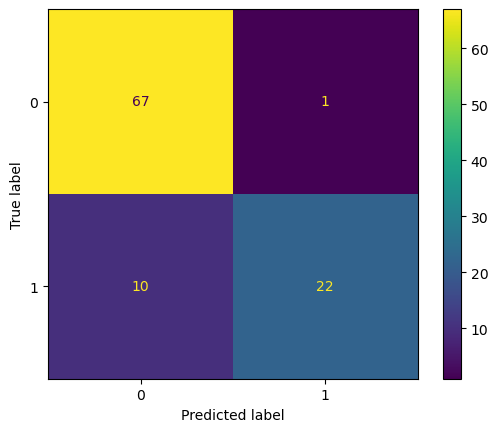

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [53]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [55]:
recall = 67 / 68
recall

0.9852941176470589

In [56]:
precision = 67 / 77
precision

0.8701298701298701

In [58]:
(2* recall * precision) / (recall + precision)
#harmonic mean of precision and recall

0.9241379310344828

In [59]:
#actual accuracy
accuracy_score(y_test, y_pred)

0.89

In [60]:
#roc auc

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve

In [66]:
y_pred_prob = log.predict_proba(x_test_scaled)[:,1]
y_pred_prob;

In [72]:
auc = roc_auc_score(y_test, y_pred_prob)
auc

0.9545036764705882

In [71]:
roc_curve(y_test, y_pred_prob)

(array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
        0.04411765, 0.04411765, 0.05882353, 0.05882353, 0.10294118,
        0.10294118, 0.14705882, 0.14705882, 0.16176471, 0.16176471,
        0.22058824, 0.22058824, 0.41176471, 0.41176471, 0.64705882,
        0.67647059, 1.        ]),
 array([0.     , 0.03125, 0.1875 , 0.1875 , 0.75   , 0.75   , 0.8125 ,
        0.8125 , 0.84375, 0.84375, 0.875  , 0.875  , 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 1.     , 1.     , 1.     ,
        1.     ]),
 array([       inf, 0.95237859, 0.88667807, 0.87686454, 0.47843811,
        0.45332175, 0.43555642, 0.43519022, 0.41548475, 0.40147195,
        0.39822022, 0.36228151, 0.34812977, 0.34200509, 0.3377789 ,
        0.32409787, 0.30669124, 0.18111912, 0.17989653, 0.09803244,
        0.09684077, 0.0226023 ]))

In [69]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

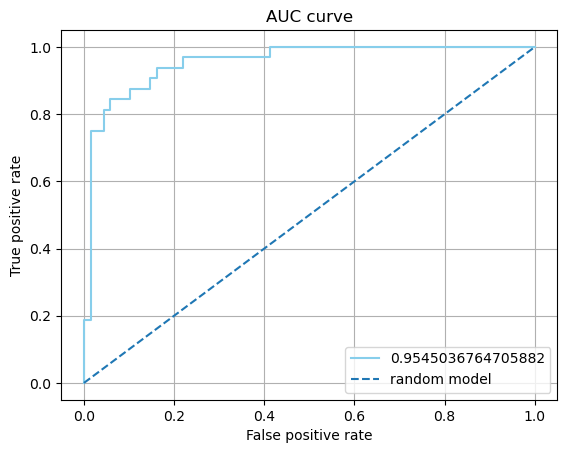

In [78]:
plt.title("AUC curve")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot(fpr, tpr, color = 'skyblue', label = auc)
plt.plot([0,1], [0,1], label = 'random model', ls = '--')
plt.grid();
plt.legend();

In [79]:
#thresholf tuning

In [80]:
y_pred_prob

array([0.20794482, 0.24916757, 0.27262097, 0.1842147 , 0.18965176,
       0.04980211, 0.07062217, 0.60700743, 0.04343346, 0.45332175,
       0.11373544, 0.10220749, 0.24503305, 0.38270823, 0.07445046,
       0.36831429, 0.32940427, 0.06565107, 0.91550267, 0.12135157,
       0.18111912, 0.84751151, 0.32409787, 0.72722661, 0.03684319,
       0.86892851, 0.17219214, 0.17000119, 0.27023586, 0.24538434,
       0.08578865, 0.3377789 , 0.78533287, 0.23813101, 0.07030272,
       0.03249916, 0.08458475, 0.1543954 , 0.09803244, 0.47843811,
       0.15872578, 0.32823773, 0.14892149, 0.11739166, 0.65629525,
       0.09684077, 0.34200509, 0.78246351, 0.05331972, 0.70172328,
       0.92164239, 0.11510851, 0.21074844, 0.41476139, 0.88667807,
       0.34812977, 0.17812399, 0.12621622, 0.44102774, 0.03185349,
       0.08284872, 0.78704123, 0.05598685, 0.39822022, 0.0226023 ,
       0.88889203, 0.11940035, 0.09684077, 0.28358369, 0.43519022,
       0.52052469, 0.28015508, 0.06176414, 0.30669124, 0.16125

In [81]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [82]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])